<a href="https://colab.research.google.com/github/erivetna87/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Section_3_and_4_Only_Eric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import numpy as np
from numpy import linalg
import random
import math
import statistics as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
from functools import reduce
from scipy.linalg import lu
import warnings 
import pprint as pp

e = np.array([[7,4,2],[1,3,-1],[2,6,-4]])
print(e)
print(e.T)
print(np.linalg.inv(e))

[[ 7  4  2]
 [ 1  3 -1]
 [ 2  6 -4]]
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


# **3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1**

In [79]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
x = df.drop(columns='Country',axis=1).values



In [81]:
x

array([[ 105,  245,  685,  147,  193,  156,  720,  253,  488,  198,  360,
        1102, 1472,   57, 1374,  375,   54],
       [ 103,  227,  803,  160,  235,  175,  874,  265,  570,  203,  365,
        1137, 1582,   73, 1256,  475,   64],
       [ 103,  242,  750,  122,  184,  147,  566,  171,  418,  220,  337,
         957, 1462,   53, 1572,  458,   62],
       [  66,  267,  586,   93,  209,  139, 1033,  143,  355,  187,  334,
         674, 1494,   47, 1506,  135,   41]])

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
z = sc.fit_transform(x)




In [83]:
print(z)

[[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


# **3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2.¶**
This might be helpful:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


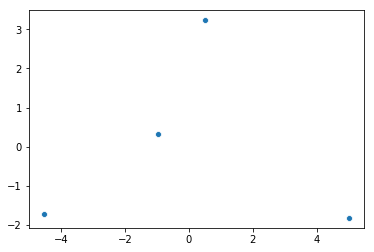

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(z)
output = pca.transform(z)
print(output)

sns.scatterplot(output[:,0],output[:,1])


# 4.1 Use K-Means to cluster the following data and then graph your results.
We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them.

Scikit-Learn K-Means Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [85]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
from sklearn.cluster import KMeans
f1 = points['x'].values
f2 = points['y'].values

X = np.array((f1))
y = np.array((f2))


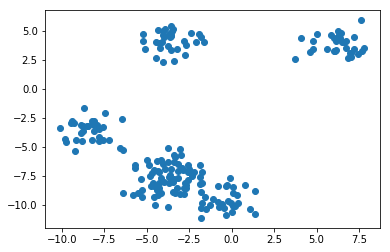

In [87]:
plt.scatter(X,y)
plt.show()

In [0]:
distortion = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(points)
  distortion.append((kmeans.inertia_))
  

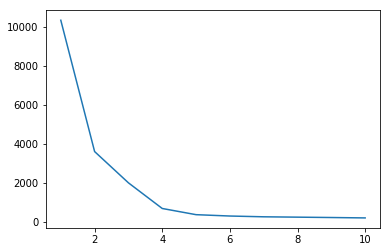

In [89]:
plt.plot(range(1,11),distortion)

In [0]:
kmeans = KMeans(n_clusters=5,max_iter=300,n_init=10)

In [0]:
clusters = kmeans.fit_predict(points)

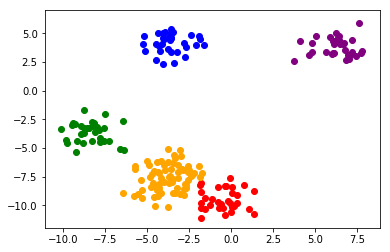

In [93]:
plt.scatter(points[clusters == 0]["x"], points[clusters == 0]["y"], color='red')
plt.scatter(points[clusters == 1]["x"], points[clusters == 1]["y"], color='blue')
plt.scatter(points[clusters == 2]["x"], points[clusters == 2]["y"], color='green')
plt.scatter(points[clusters == 3]["x"], points[clusters == 3]["y"], color='purple')
plt.scatter(points[clusters == 4]["x"], points[clusters == 4]["y"], color='orange')